In [1]:
import matplotlib.pylab as plt 
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
import math
import analyzeGotran as ao
import subprocess as sb
from subprocess import PIPE
import shlex
import time
import ScriptRunner as SR
import matplotlib.pyplot as plt; plt.rcdefaults()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import pickle

from spectrum import *
from scipy.interpolate import spline
from scipy import stats

%matplotlib inline

### ODE File name 

In [2]:
odefilename = 'p2xp2yMigration33'

## P2X-P2Y Paper Figure Generator

### Resonance of G protein and IP3

In [3]:
duration = 10000
data_name = ['100wCD39','1000wCD39','100woCD39','1000woCD39']
ATPselec = [100,1000,100,1000]
data_storage_Gprot = {}
data_storage_DAG = {}

for i in np.arange(len(ATPselec)):
    if i <= 1 :
        CD39switch = 1
    elif i > 1:
        CD39switch = 0
    rawdata = SR.gotranMicroglia(sim_time      = duration,
                              ATP           = ATPselec[i],
                              output_name   = 'test1',
                              ode_file_name = odefilename,
                              data_name2    = 'GaGTP',
                              data_name3    = 'DAG',
                              DegSwitch     = CD39switch,
                              removePickle  = 1)
    
    data_storage_Gprot[data_name[i]] = rawdata[2]
    data_storage_DAG[data_name[i]] = rawdata[3]
    


 -------------- 54.304784536361694 seconds --------------
 ------------ End of Simulation -----------
 -------------- 53.94892907142639 seconds --------------
 ------------ End of Simulation -----------
 -------------- 71.04485321044922 seconds --------------
 ------------ End of Simulation -----------
 -------------- 89.05247688293457 seconds --------------
 ------------ End of Simulation -----------


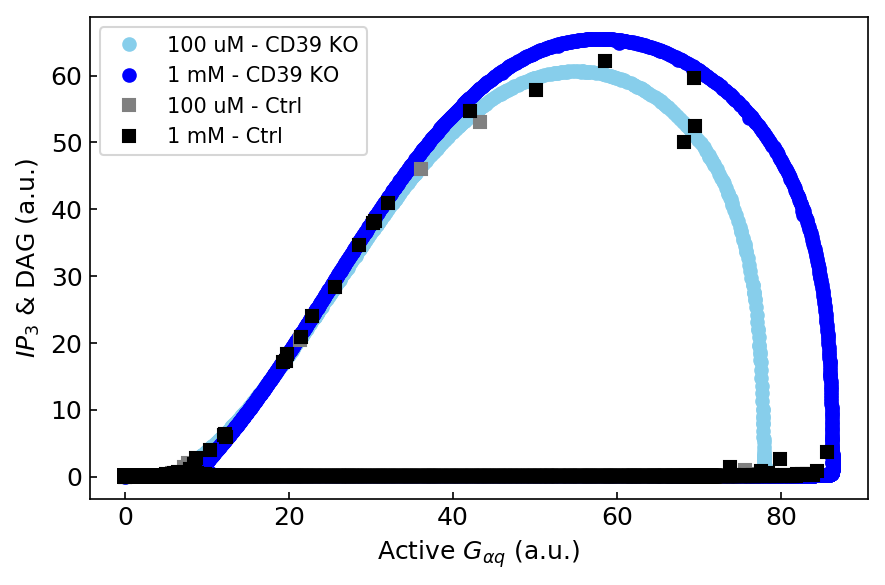

In [8]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.plot(data10[2],data10[3],'bo',alpha=1,label='10 uM')
plt.plot(data_storage_Gprot['100woCD39'],data_storage_DAG['100woCD39'],'skyblue',marker='o',lw=0,alpha=1,label='100 uM - CD39 KO')
plt.plot(data_storage_Gprot['1000woCD39'],data_storage_DAG['1000woCD39'],'bo',alpha=1,label='1 mM - CD39 KO')
plt.plot(data_storage_Gprot['100wCD39'],data_storage_DAG['100wCD39'],'grey',marker='s',lw=0,alpha=1,label='100 uM - Ctrl')
plt.plot(data_storage_Gprot['1000wCD39'],data_storage_DAG['1000wCD39'],'ks',alpha=1,label='1 mM - Ctrl')
plt.xlabel(r"Active $G_{\alpha q}$ (a.u.)",fontsize=12)
plt.ylabel("$IP_3$ & DAG (a.u.)",fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()


#### Ca transients

In [9]:
noP2X7 = np.array([100.00,104.00,168.80,128.53,121.60,118.93,123.20,116.27,108.80,109.87,107.73,110.67,
                   105.33,109.07,102.93,101.33,105.60,104.00,106.13,104.00,113.87,105.33,104.53,103.20,
                   109.33,106.67,103.20,102.67,104.27,102.40]) 
time1 =  np.array([0.00,0.42,0.61,0.98,1.10,1.33,1.44,1.86,2.05,2.08,2.35,2.54,2.73,2.92,3.33,3.64,3.79,3.98,4.09,4.17,
                   4.58,4.89,5.15,5.42,5.68,5.95,6.14,6.52,6.63,6.86])

lowATP = np.array([100.00,100.53,136.80,178.93,174.93,130.13,107.47,100.53,100.27,100.80,100.27,
                   101.60,101.87,100.53,100.80,100.80,101.33,100.53,102.93])
time2  = np.array([0.00,0.38,0.49,1.02,1.21,1.67,2.16,2.77,3.11,4.24,4.32,4.66,4.89,5.08,5.30,5.49,5.91,6.10,6.40])

All    = np.array([100.00,100.00,175.73,166.13,156.27,161.60,153.60,162.93,155.47,164.53,162.40,163.47,154.40,160.27,
                   151.73,161.60,136.27,157.33,137.07,131.73,134.13,134.13,157.87,131.73,146.93,128.80,129.60,129.07,
                   131.47,151.73,125.87,133.33,125.87,149.60,126.40])
time3  = np.array([0.00,0.42,0.61,0.72,1.06,1.17,1.33,1.48,1.93,2.01,
                   2.16,2.20,2.42,2.50,2.69,2.80,3.18,3.41,3.60,3.83,
                   3.94,4.09,4.28,4.70,5.27,5.80,5.91,6.10,6.29,6.52,
                   7.08,7.50,7.92,8.26,8.79])

In [11]:
duration = 600
CellType = ['WT','P7KO','LowATP']
data_wCD39 = {}
data_woCD39 = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT':
        ATP = 1000
        p2x7 = 1 
    elif CellType[i] == 'P7KO':
        ATP = 1000
        p2x7 = 0
    elif CellType[i] == 'LowATP':
        ATP = 100
        p2x7 = 1
        
    data1  = SR.gotranMicroglia(sim_time      = duration,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                data_name3    = 'Cap2y',
                                EleSwitch     = 0,
                                DegSwitch     = 1,
                                removePickle  = 1)
    
    data2  = SR.gotranMicroglia(sim_time      = 600,
                                ATP           = ATP,
                                output_name   = 'test1',
                                ode_file_name = odefilename,
                                rhop2x4       = 1,
                                rhop2x7       = p2x7,
                                rhop2yc       = 1,
                                data_name2    = 'CaER',
                                data_name3    = 'Cap2y',
                                EleSwitch     = 0,
                                DegSwitch     = 0,
                                removePickle  = 1)
    
    data_wCD39[CellType[i]] = data1[1]
    data_woCD39[CellType[i]] = data2[1]
    dura = data1[0]
    
CaAll = data_wCD39['WT']
CaNoP7 = data_wCD39['P7KO']
CaAllno = data_woCD39['WT']
CaNoP7no = data_woCD39['P7KO']
CalowATP = data_wCD39['LowATP']
CalowATPno = data_woCD39['LowATP']

 -------------- 6.013521194458008 seconds --------------
 ------------ End of Simulation -----------
 -------------- 7.5865843296051025 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.005573987960815 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.832270383834839 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.815143585205078 seconds --------------
 ------------ End of Simulation -----------
 -------------- 6.202348232269287 seconds --------------
 ------------ End of Simulation -----------


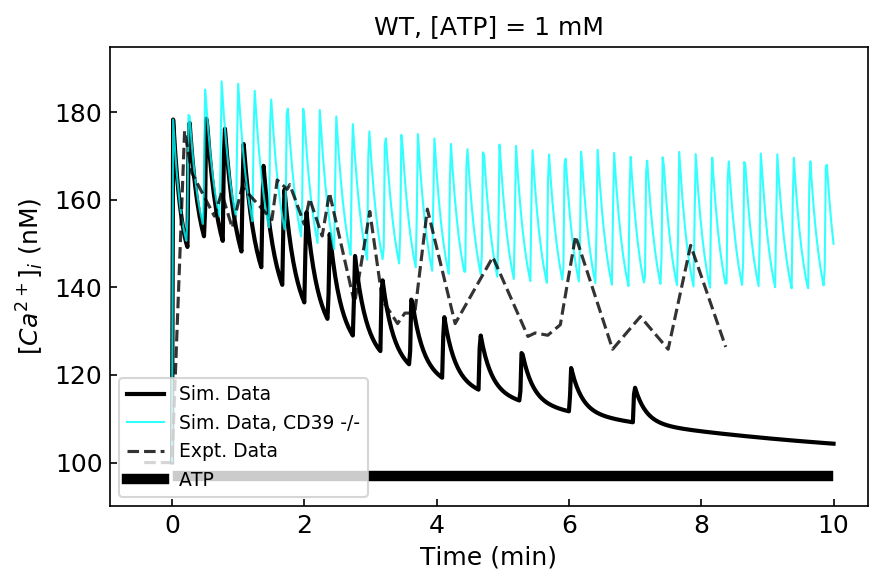

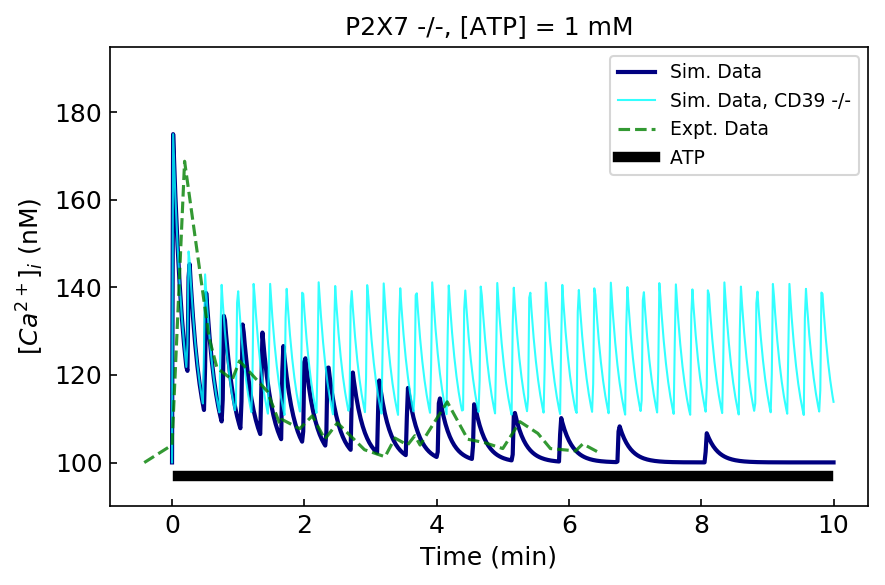

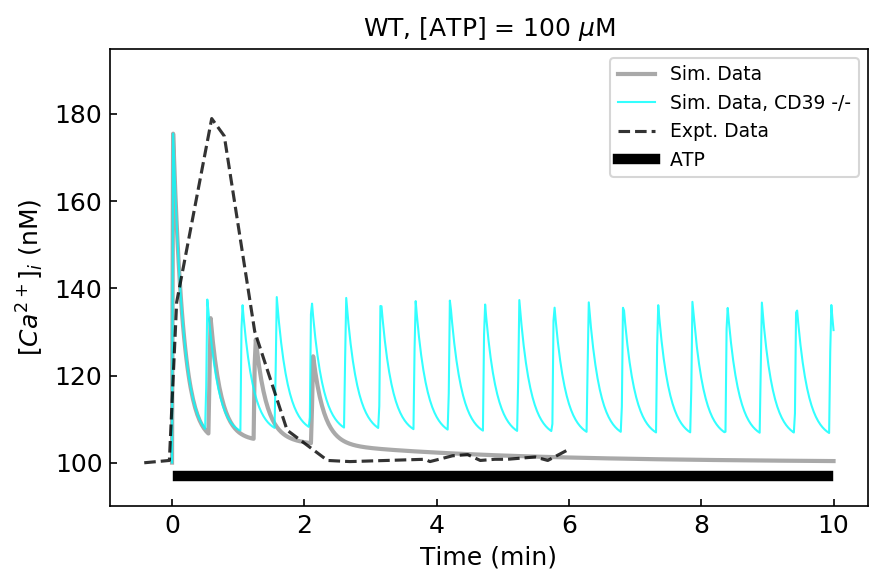

In [16]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaAll,'k',lw=2,label='Sim. Data')
plt.plot(dura/60,CaAllno,'cyan',lw=1,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time3-0.42,All,'k--',lw=1.5,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('P2X7 -/-, [ATP] = 1 mM',fontsize=12)
plt.plot(dura/60,CaNoP7,'navy',lw=2,label='Sim. Data')
plt.plot(dura/60,CaNoP7no,'cyan',lw=1,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time1-0.42,noP2X7,'g--',lw=1.5,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.title('WT, [ATP] = 100 $\mu$M',fontsize=12)
plt.plot(dura/60,CalowATP,'darkgray',lw=2,label='Sim. Data')
plt.plot(dura/60,CalowATPno,'cyan',lw=1,alpha=0.8,label='Sim. Data, CD39 -/-')
plt.plot(time2-0.42,lowATP,'k--',lw=1.5,alpha=0.8,label='Expt. Data')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.ylim([90,195])
plt.tight_layout()


#### Ca transients - ER

In [17]:
duration = 600
CellType = ['WT-low','KO-low','WT','KO']
data_Ca_Cy = {}
data_Ca_ER = {}

for i in np.arange(len(CellType)):
    if CellType[i] == 'WT-low':
        ATP = 100
        p2x4 = 1
        p2x7 = 1
    elif CellType[i] == 'KO-low':
        ATP = 100
        p2x4 = 0
        p2x7 = 0        
    elif CellType[i] == 'WT':
        ATP = 1000
        p2x4 = 1
        p2x7 = 1
    elif CellType[i] == 'KO':
        ATP = 1000
        p2x4 = 0
        p2x7 = 0

    data   =  SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP,
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = p2x4,
                                 rhop2x7       = p2x7,
                                 rhop2yc       = 1,
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data_Ca_Cy[CellType[i]] = data[1]
    data_Ca_ER[CellType[i]] = data[2]
    dura = data[0]
    
Ca2 = data_Ca_Cy['KO-low']
Ca3 = data_Ca_Cy['KO']
Ca4 = data_Ca_Cy['WT-low']
Ca5 = data_Ca_Cy['WT']
caer2 = data_Ca_ER['KO-low']
caer3 = data_Ca_ER['KO']
caer4 = data_Ca_ER['WT-low']
caer5 = data_Ca_ER['WT']
    

 -------------- 4.9833362102508545 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.817364454269409 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.951859474182129 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.8673176765441895 seconds --------------
 ------------ End of Simulation -----------


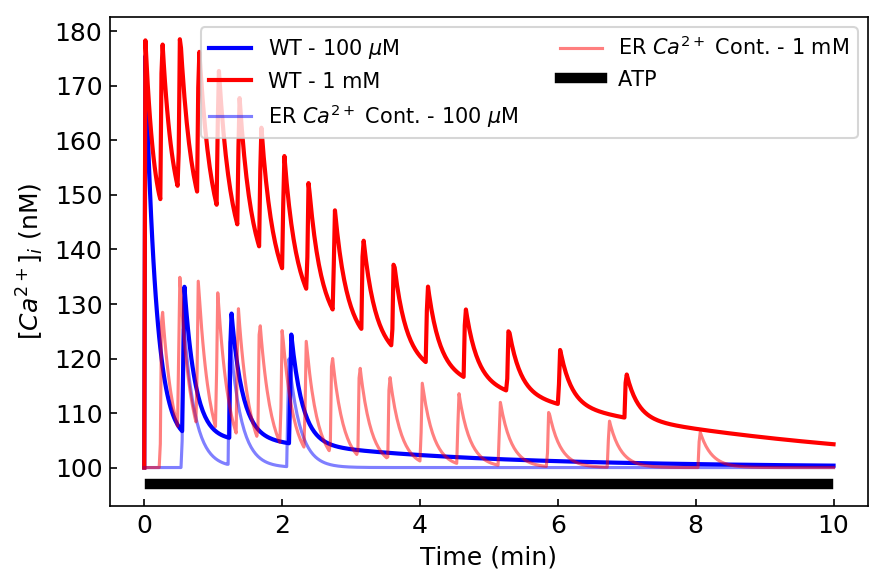

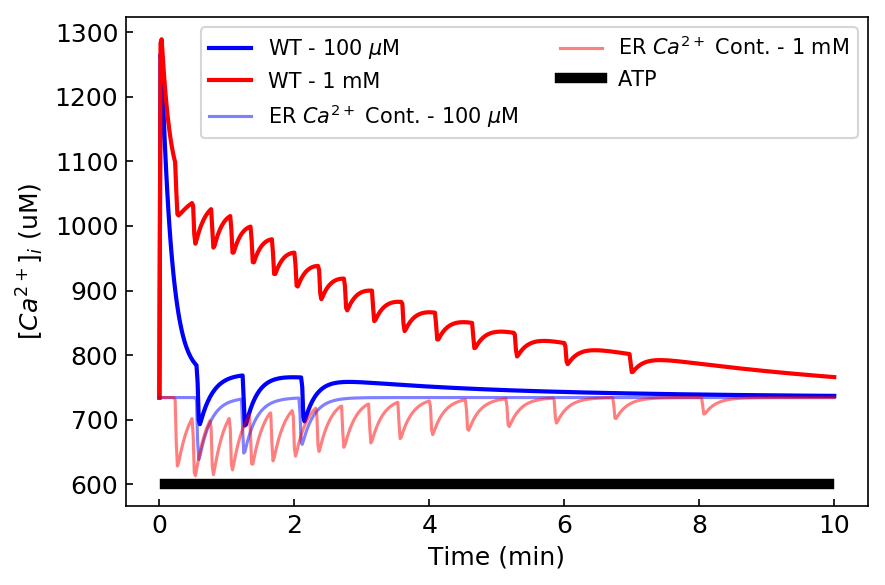

In [18]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,Ca4,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
plt.plot(dura/60,Ca5,'r-',lw=2,alpha=1,label='WT - 1 mM')
plt.plot(dura/60,Ca2,'b-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 100 $\mu$M')
plt.plot(dura/60,Ca3,'r-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 1 mM')
plt.plot([5/60,595/60],[97,97],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12)
plt.legend(fontsize=10,loc=0, ncol=2)
plt.tight_layout()

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,caer4/1000,'b-',lw=2,alpha=1,label='WT - 100 $\mu$M')
plt.plot(dura/60,caer5/1000,'r-',lw=2,alpha=1,label='WT - 1 mM')
plt.plot(dura/60,caer2/1000,'b-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 100 $\mu$M')
plt.plot(dura/60,caer3/1000,'r-',lw=1.5,alpha=0.5,label='ER $Ca^{2+}$ Cont. - 1 mM')
plt.plot([5/60,595/60],[600,600],'k',lw=5,label='ATP')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (uM)',fontsize=12)
plt.legend(fontsize=10,loc=0, ncol=2)
plt.tight_layout()


#### BV2 Model vs. Experiment

In [9]:
duration = 600

exprP2  = {'acute':1/11.1,'prime':1,'bv':1}
exprP4  = {'acute':1/2.95,'prime':1,'bv':0.187}
exprP7  = {'acute':2.65,'prime':1,'bv':0.65}
ATP = [0,50,100,500,1000]
data_prime = {}
data_bv = {}
data_acute = {}

for i in np.arange(len(ATP)):
    data1   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['prime'],
                                 rhop2x7       = exprP7['prime'],
                                 rhop2yc       = exprP2['prime'],
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data2   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['bv'],
                                 rhop2x7       = exprP7['bv'],
                                 rhop2yc       = exprP2['bv'],
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data3   = SR.gotranMicroglia(sim_time      = duration,
                                 ATP           = ATP[i],
                                 output_name   = 'test1',
                                 ode_file_name = odefilename,
                                 rhop2x4       = exprP4['acute'],
                                 rhop2x7       = exprP7['acute'],
                                 rhop2yc       = exprP2['acute'],
                                 data_name2    = 'CaER',
                                 data_name3    = 'Cap2y',
                                 EleSwitch     = 0,
                                 DegSwitch     = 1,
                                 removePickle  = 1)
    
    data_prime[str(ATP[i])] = data1[1]
    data_bv[str(ATP[i])] = data2[1]
    data_acute[str(ATP[i])] = data3[1]
    


dura=data1[0]
data =[data_bv['0'],data_bv['50'],data_bv['100'],data_bv['500'],data_bv['1000']]
datap =[data_prime['0'],data_prime['50'],data_prime['100'],data_prime['500'],data_prime['1000']]
dataac =[data_acute['0'],data_acute['50'],data_acute['100'],data_acute['500'],data_acute['1000']]

 -------------- 4.6231467723846436 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.544874906539917 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.58355188369751 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.866792917251587 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.780604600906372 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.719677686691284 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.815999984741211 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.919938802719116 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.70059061050415 seconds --------------
 ------------ End of Simulation -----------
 -------------- 5.714454412460327 seconds --------------
 ------------ End of Simulation ---

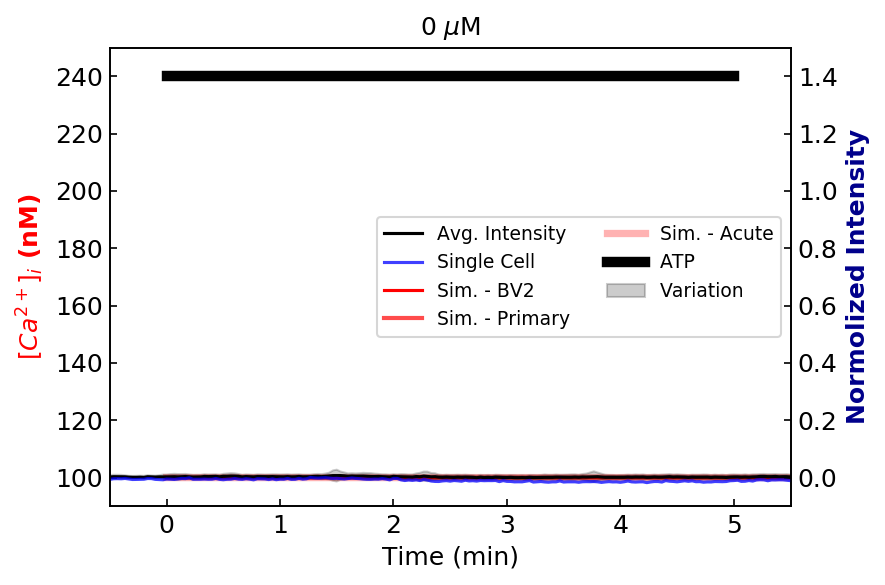

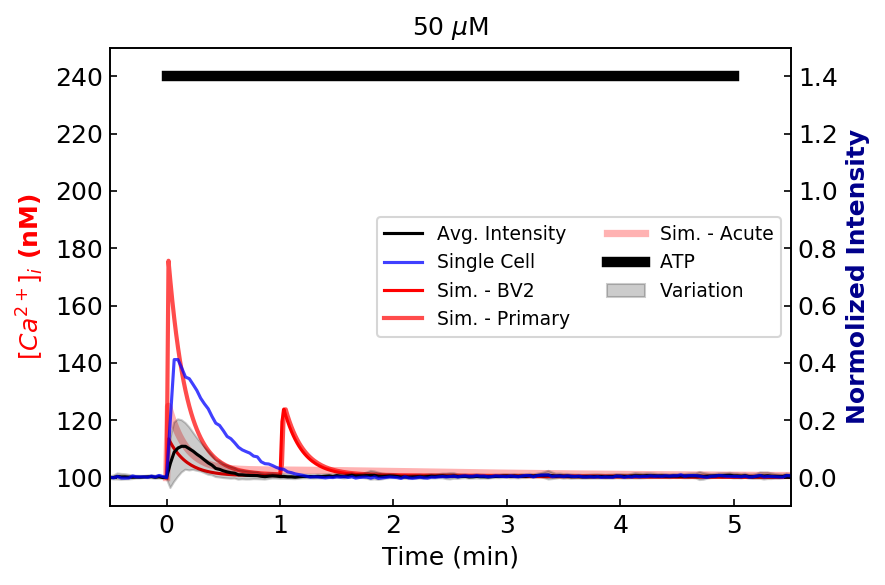

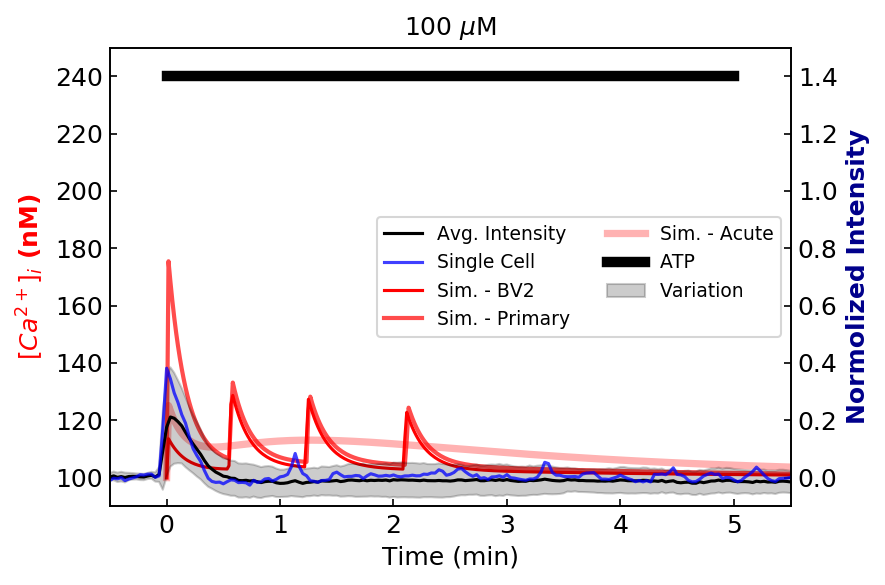

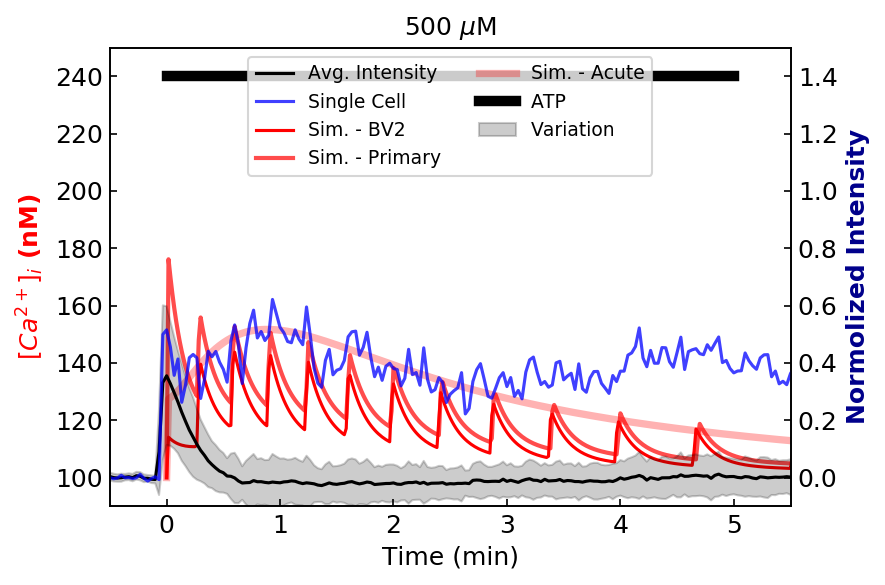

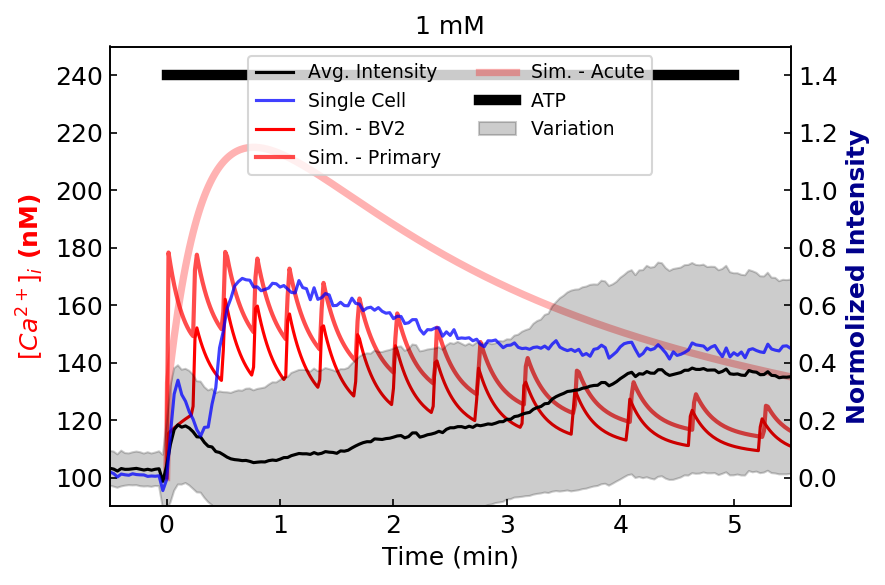

In [11]:
case=["0uM","50uM","100uM","500uM","1mM"]

#read in the traces
with open('expt/all_traces_BV0629','rb') as f:
    all_traces = pickle.load(f)
with open('expt/Normolized_traces_BV0629','rb') as f:
    normalize_traces = pickle.load(f)

    
# calculate the average trace of each case and plot the std as shaded area
# first, for each case, stack the traces vertically, please search np.vstack to understand this step
stacked_traces = dict()
for i in case:
    temp = normalize_traces[i][0]
    for j in np.arange(1,len(normalize_traces[i])):
        temp = np.vstack((temp,normalize_traces[i][j]))
    stacked_traces[i] = temp
    
    
# get the mean and std for each case
meanTrace = dict()
std = dict()
for i in case:
    meanTrace[i] = np.mean(stacked_traces[i],axis=0)
    std[i] = np.std(stacked_traces[i],axis=0)
    
data1a = normalize_traces["0uM"][1]
data2a = normalize_traces["50uM"][19]
data3a = normalize_traces["100uM"][22]
data4a = normalize_traces["500uM"][31]
data5a = normalize_traces["1mM"][38]
dataa = [data1a, data2a, data3a, data4a, data5a]  

#plt.figure(figsize=(12,12),dpi=150)
Case = ['0 uM', '50 uM', '100 uM', '500 uM', '1 mM']
Case2 = ['0 $\mu$M', '50 $\mu$M', '100 $\mu$M', '500 $\mu$M', '1 mM']
for i,j in enumerate(case):
    color1 = 'red'
    color2 = 'darkblue'
    plt.figure(figsize=(6,4),dpi=150)
    ax1 = plt.subplot()
    #ax1 = plt.subplot(3,2,i+1)
    ax1.tick_params(labelsize=12,direction='in')
    ax1.plot(dura/60,data[i],'r',lw=1.5)
    ax1.plot(dura/60,datap[i],'r',lw=2,alpha=0.7)
    ax1.plot(dura/60,dataac[i],'r',lw=3.5,alpha=0.3)
    ax1.set_ylim([90,250])
    ax1.set_xlim([-0.5,5.5])
    ax1.set_ylabel('$[Ca^{2+}]_i$ (nM)',fontsize=12,color=color1,alpha=1,fontweight='bold')
        
    ax2 = ax1.twinx()
    ax2.tick_params(labelsize=12,direction='in')
    x = np.arange(len(meanTrace[j]))
    y = meanTrace[j]/10000
    ax2.plot(x*2/60-10,y,'k-',lw=1.5,label='Avg. Intensity')
    ax2.plot(x*2/60-10,dataa[i]/10000,'b-',lw=1.5,alpha=0.75,label='Single Cell')
    ax2.fill_between(x*2/60-10, y-std[j]/10000, y+std[j]/10000,alpha=0.2, edgecolor='black', facecolor='black', label='Variation')
    ax2.plot([100],[100],'r',lw=1.5,label='Sim. - BV2')
    ax2.plot([100],[100],'r',lw=2,alpha=0.7,label='Sim. - Primary')
    ax2.plot([100],[100],'r',lw=3.5,alpha=0.3,label='Sim. - Acute')
    ax2.set_ylim([-0.1,1.5])
    ax2.set_xlim([-0.5,5.5])
    ax2.plot([0,5],[1.4,1.4],'k-',lw=5,label='ATP')
    ax2.set_ylabel("Normolized Intensity",fontsize=12,color=color2,alpha=1,fontweight='bold')
        
    ax1.set_xlabel('Time (min)',fontsize=12)
    plt.legend(loc='best',fontsize=9,ncol=2)
    plt.title(Case2[i],fontsize=12)
    plt.tight_layout()


In [51]:
p2y = [0,1]
deg = [0,1]
atp = [10,100,1000]
counter = 0
duration = 300

for a in np.arange(len(atp)):
    for p in np.arange(len(p2y)):
        for d in np.arange(len(deg)):
            data     = SR.gotranMicroglia(sim_time      = duration,
                                          ATP           = atp[a],
                                          output_name   = 'test1',
                                          ode_file_name = odefilename,
                                          rhop2yc       = p2y[p],
                                          data_name2    = 'DNA_TNF',
                                          data_name3    = 'DNATNF',
                                          data_name4    = 'mRNA_TNF',
                                          data_name5    = 'TNFae',
                                          DegSwitch     = deg[d],
                                          removePickle  = 1)
            if counter == 0:
                dura    = data[0]
                mrna    = data[4]
                tnfa    = data[5]
            else:
                tnfa    = np.vstack([tnfa,data[5]])
                mrna    = np.vstack([mrna,data[4]])
                              
            counter = counter + 1



 -------------- 3.0583412647247314 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.14703631401062 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.137342691421509 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2211949825286865 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.058450698852539 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.137294054031372 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.55696439743042 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.383051872253418 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0781545639038086 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.12312650680542 seconds --------------
 ------------ End of Simulation --

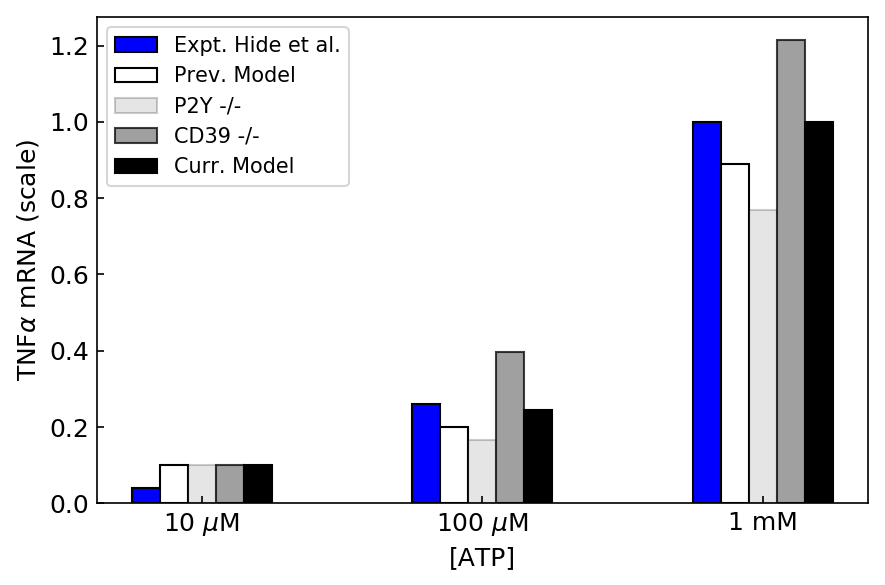

In [53]:
bar_width = 0.1
space = bar_width/2

prev = (np.array([mrna[0][-1], mrna[4][-1], mrna[8][-1]]) - mrna[0][0])/(mrna[11][-1]-mrna[1][0])
curr = (np.array([mrna[3][-1], mrna[7][-1], mrna[11][-1]]) - mrna[3][0])/(mrna[11][-1]-mrna[1][0])
nocd = (np.array([mrna[2][-1], mrna[6][-1], mrna[10][-1]]) - mrna[2][0])/(mrna[11][-1]-mrna[1][0])
nopy = (np.array([mrna[1][-1], mrna[5][-1], mrna[9][-1]]) - mrna[1][0])/(mrna[11][-1]-mrna[1][0])
exp = [expAt10uM5min, expAt100uM5min, expAt1mM5min]/expAt1mM5min

objects = ('10 $\mu$M','100 $\mu$M','1 mM')
y_pos = np.arange(len(objects))

plt.figure(figsize=(6,4),dpi=150)
plt.bar(y_pos-space*4, exp,  bar_width, align='center', color='blue', alpha=1, edgecolor='black',label='Expt. Hide et al.')
plt.bar(y_pos-space*2, prev, bar_width, align='center', color='white', alpha=1, edgecolor='black',label='Prev. Model')
plt.bar(y_pos-space*0, nopy, bar_width, align='center', color='gray', alpha=0.2, edgecolor='black',label='P2Y -/-')
plt.bar(y_pos+space*2, nocd, bar_width, align='center', color='gray', alpha=0.75, edgecolor='black',label='CD39 -/-')
plt.bar(y_pos+space*4, curr, bar_width, align='center', color='black', alpha=1, edgecolor='black',label='Curr. Model')

plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA (scale)',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()


#### Akt valdiation

In [18]:
ATP = np.array([10,50,100,1000])
time = 300
counter = 0
p2x4 = np.array([1])
p2x7 = np.array([1])
p2yc = np.array([1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                elif p2x4[j] == 0 and p2x7[k] == 0:
                    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                                ATP           = ATP[i],
                                                output_name   = 'test1',
                                                ode_file_name = odefilename,
                                                rhop2x4       = p2x4[j],
                                                rhop2x7       = p2x7[k],
                                                rhop2yc       = p2yc[l],
                                                kf5_p2y12     = 0.001,
                                                data_name2    = 'pAkt',
                                                DegSwitch     = 1,
                                                removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        pAkt    = data[2]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        py      = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        pAkt    = np.vstack([pAkt,data[2]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        py      = np.append(py,p2yc[l])
                              
                    counter = counter + 1
                
data   = SR.gotranMicroglia(sim_time      = time,
                            ATP           = 50,
                            output_name   = 'test1',
                            ode_file_name = odefilename,
                            kf5_p2y12     = 0.001,
                            data_name2    = 'pAkt',
                            DegSwitch     = 0,
                            removePickle  = 1) 

pAkt = np.vstack([pAkt,data[2]])

 -------------- 3.0926949977874756 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.255786657333374 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.4273765087127686 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.1146180629730225 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.5249581336975098 seconds --------------
 ------------ End of Simulation -----------


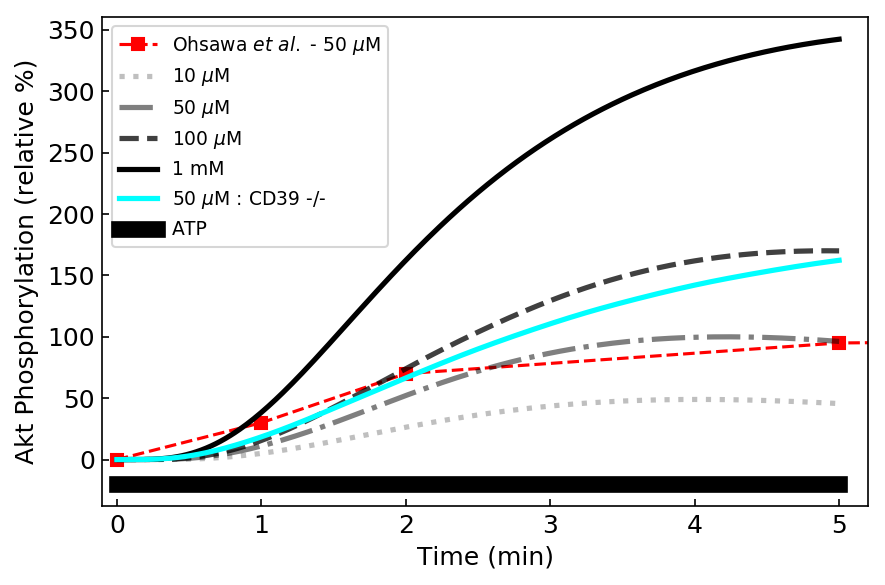

In [16]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
time = [0,1,2,5,10]
plt.plot(time,[0,30,70,95,100],'r--s',linewidth=1.5,alpha=1,label='Ohsawa $et$ $al.$ - 50 $\mu$M')
plt.tight_layout()
plt.plot(dura/60,pAkt[0]/max(pAkt[1])*100,'k:',linewidth=2.5,alpha=0.25,label="10 $\mu$M")
plt.plot(dura/60,pAkt[1]/max(pAkt[1])*100,'k-.',linewidth=2.5,alpha=0.5,label="50 $\mu$M")
plt.plot(dura/60,pAkt[2]/max(pAkt[1])*100,'k--',linewidth=2.5,alpha=0.75,label="100 $\mu$M")
plt.plot(dura/60,pAkt[3]/max(pAkt[1])*100,'k-',linewidth=2.5,alpha=1,label="1 mM")
plt.plot(dura/60,pAkt[4]/max(pAkt[1])*100,'cyan',linewidth=2.5,alpha=1,label="50 $\mu$M : CD39 -/-")
plt.plot(dura/60,np.ones(len(dura))*(-20),'k-',lw=8,alpha=1,label='ATP')
plt.legend(loc=0,fontsize=9)
plt.xlabel("Time (min)",fontsize=12)
plt.ylabel("Akt Phosphorylation (relative %)",fontsize=12)
plt.xlim([-0.1,5.2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)


#### Migration validation against Ohsawa et al (2002)

In [22]:
ATP = np.array([50])
time = 300
counter = 0
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                #elif p2x4[j] == 0 and p2x7[k] == 0:
                #    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                            ATP           = ATP[i],
                                            output_name   = 'test1',
                                            ode_file_name = odefilename,
                                            rhop2x4       = p2x4[j],
                                            rhop2x7       = p2x7[k],
                                            rhop2y12      = p2yc[l],
                                            kf5_p2y12     = 0.001,
                                            data_name2    = 'Q12_ptxf',
                                            data_name3    = 'Gb',
                                            data_name4    = 'PI3Ka',
                                            data_name5    = 'pAkt',
                                            data_name6    = 'Distance',
                                            DegSwitch     = 1,
                                            removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        Q12     = data[2]
                        Gb      = data[3]
                        pi3ka   = data[4]
                        pakt    = data[5]
                        p2y12   = data[6]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        p12     = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        Q12     = np.vstack([Q12,data[2]])
                        Gb      = np.vstack([Gb,data[3]])
                        pi3ka   = np.vstack([pi3ka,data[4]])
                        pakt    = np.vstack([pakt,data[5]])
                        p2y12   = np.vstack([p2y12,data[6]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        p12     = np.append(p12,p2yc[l])
                              
                    counter = counter + 1
    
import pandas as pd 

data = {
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Y12': p12
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.2173657417297363 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.154301881790161 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.188178062438965 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.182220697402954 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.143082857131958 seconds --------------
 ------------ End of Simulation -----------


,ATP in uM,P2X4,P2X7,P2Y12
0,50,0,0,1
1,50,0,1,1
2,50,1,0,1
3,50,1,1,0
4,50,1,1,1


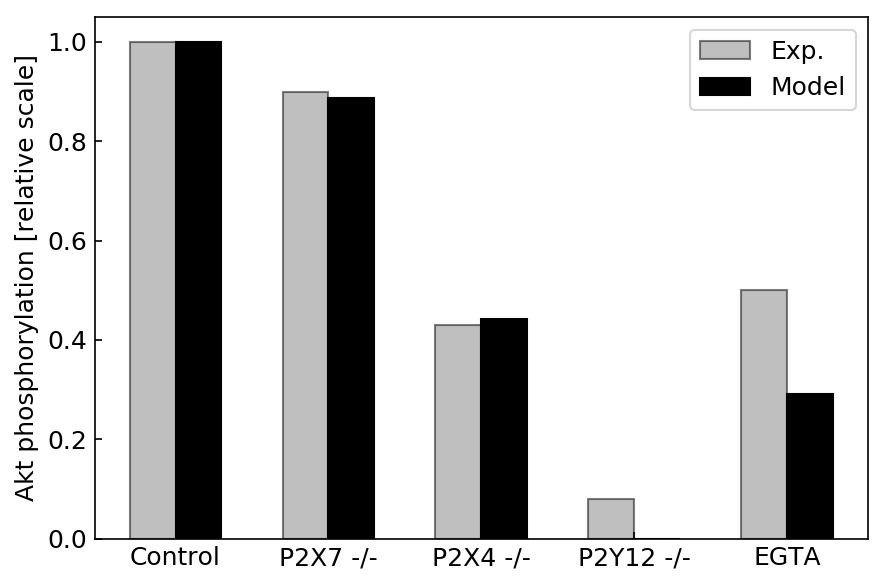

In [24]:
data = np.array([pakt[4][300],pakt[2][300],pakt[1][300],pakt[3][300],pakt[0][300]])
ratio = data/max(data)
expratio = np.array([100,90,43,8,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
bar_width = 0.3
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,1)
#plt.title('A',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, ratio, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Akt phosphorylation [relative scale]',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()


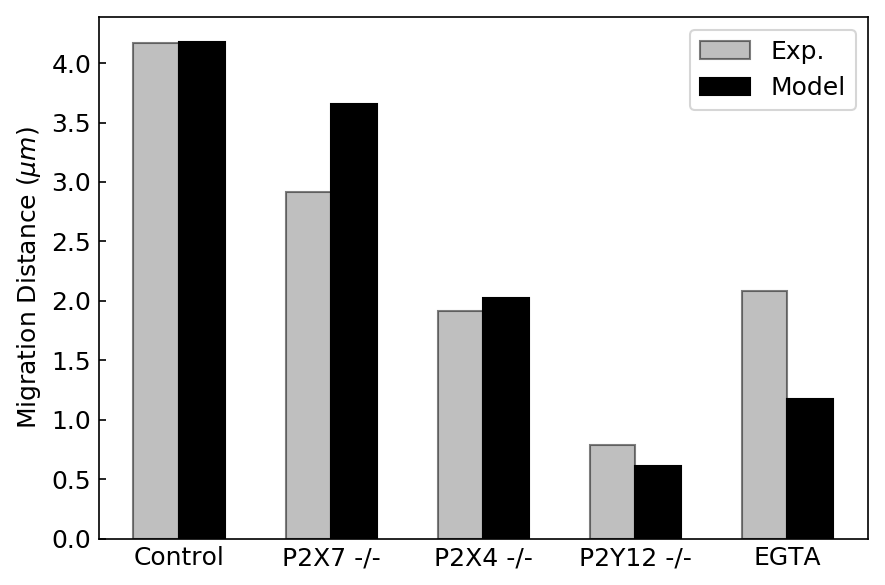

In [25]:
data2 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
ratio = data2/max(data2)
expratio = np.array([100,70,46,19,50])/100
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio*50/12, bar_width, align='center', color='gray', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
#plt.ylim([0.5,2.85])
plt.xticks(y_pos, objects)
plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)


In [26]:
ATP = np.array([50])
time = 300
counter = 0
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])

for i in np.arange(len(ATP)): # ATP
    for j in np.arange(len(p2x4)):
        for k in np.arange(len(p2x7)):
            for l in np.arange(len(p2yc)):
                if p2x4[j] + p2x7[k] + p2yc[l] == 0:
                    continue
                #elif p2x4[j] == 0 and p2x7[k] == 0:
                #    continue
                elif p2x4[j] == 0 and p2yc[l] == 0:
                    continue
                elif p2x7[k] == 0 and p2yc[l] == 0:
                    continue
                else: 
                    data   = SR.gotranMicroglia(sim_time      = time,
                                            ATP           = ATP[i],
                                            output_name   = 'test1',
                                            ode_file_name = odefilename,
                                            rhop2x4       = p2x4[j],
                                            rhop2x7       = p2x7[k],
                                            rhop2y12      = p2yc[l],
                                            kf5_p2y12     = 0.001,
                                            data_name2    = 'Q12_ptxf',
                                            data_name3    = 'Gb',
                                            data_name4    = 'PI3Ka',
                                            data_name5    = 'pAkt',
                                            data_name6    = 'Distance',
                                            DegSwitch     = 0,
                                            removePickle  = 1)
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        Q12     = data[2]
                        Gb      = data[3]
                        pi3ka   = data[4]
                        paktn    = data[5]
                        p2y12n   = data[6]
                        atp     = ATP[i]
                        p4      = p2x4[j]
                        p7      = p2x7[k]
                        p12     = p2yc[l]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        Q12     = np.vstack([Q12,data[2]])
                        Gb      = np.vstack([Gb,data[3]])
                        pi3ka   = np.vstack([pi3ka,data[4]])
                        paktn    = np.vstack([paktn,data[5]])
                        p2y12n   = np.vstack([p2y12n,data[6]])
                        atp     = np.append(atp,ATP[i])
                        p4      = np.append(p4,p2x4[j])
                        p7      = np.append(p7,p2x7[k])
                        p12     = np.append(p12,p2yc[l])
                              
                    counter = counter + 1
    
import pandas as pd 

data = {
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Y12': p12
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.6455442905426025 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.3975002765655518 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.6622650623321533 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.6305127143859863 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.5204720497131348 seconds --------------
 ------------ End of Simulation -----------


,ATP in uM,P2X4,P2X7,P2Y12
0,50,0,0,1
1,50,0,1,1
2,50,1,0,1
3,50,1,1,0
4,50,1,1,1


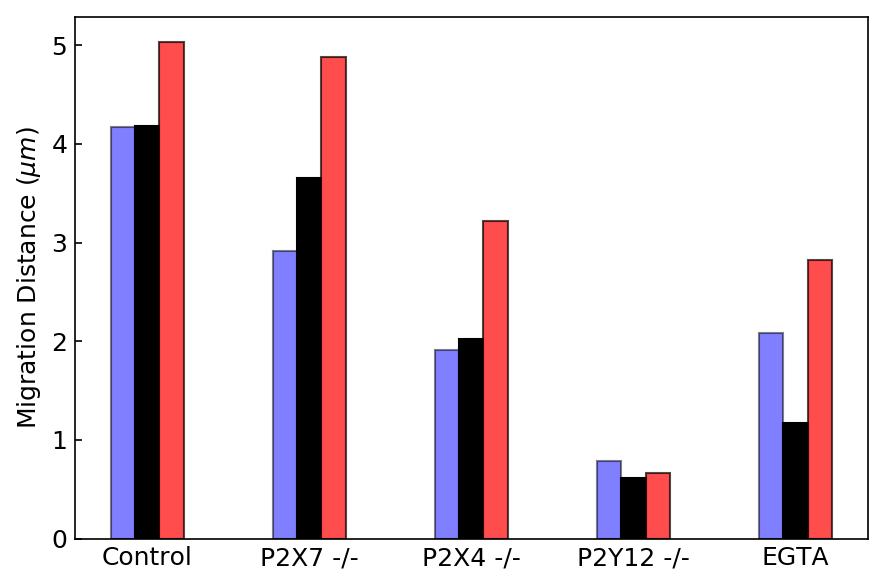

In [27]:
data1 = np.array([p2y12[4][300],p2y12[2][300],p2y12[1][300],p2y12[3][300],p2y12[0][300]])
data2 = np.array([p2y12n[4][300],p2y12n[2][300],p2y12n[1][300],p2y12n[3][300],p2y12n[0][300]])
expratio = np.array([100,70,46,19,50])/100*50/12
objects = ('Control','P2X7 -/-','P2X4 -/-','P2Y12 -/-','EGTA')

bar_width = 0.15

y_pos = np.arange(len(objects))
plt.figure(figsize=(6,4),dpi=150)
#ax = plt.subplot(1,2,2)
#plt.title('B',fontsize=12,fontweight='bold',loc='left')
bar1 = plt.bar(y_pos-0.15, expratio, bar_width, align='center', color='blue', alpha=0.5, edgecolor='black', label='Exp.')
bar2 = plt.bar(y_pos, data1, bar_width, align='center', color='k', alpha=1, edgecolor='black', label='Model')
bar3 = plt.bar(y_pos+0.15, data2, bar_width, align='center', color='red', alpha=0.7, edgecolor='black', label='Model')
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Migration Distance ($\mu m$)',fontsize=12)

plt.tight_layout()

plt.subplots_adjust(wspace=0.25)


#### KO of purinergic receptor and migration/TNFa production 

In [160]:
p2x4 = np.array([0,1])
p2x7 = np.array([0,1])
p2yc = np.array([0,1])
p2y12 = np.array([0,1])
A = np.array([0,10,50,100,1000])
time = 300
counter = 0

for i in np.arange(len(A)): # ATP
    for j in np.arange(len(p2yc)): # P2Yc
        for k in np.arange(len(p2x7)): # P2X7
            for l in np.arange(len(p2x4)): # P2X4
                for n in np.arange(len(p2y12)): #P2Y12
                    if p2yc[j] + p2x7[k] + p2x4[l] + p2y12[n] == 0:
                        continue
                    elif p2x7[k] + p2x4[l] + p2y12[n] == 0:
                        continue 
                    elif p2yc[j] + p2x4[l] + p2y12[n] == 0:
                        continue 
                    elif p2yc[j] + p2x7[k] + p2y12[n] == 0:
                        continue
                    elif p2yc[j] + p2x7[k] + p2x4[l]  == 0:
                        continue
                    elif p2x4[l] + p2y12[n]  == 0:
                        continue
                    elif p2yc[j] + p2x7[k]  == 0:
                        continue
                    elif p2yc[j] + p2y12[n]  == 0:
                        continue
                    elif p2yc[j] + p2x4[l] == 0:
                        continue
                    elif p2x7[k] + p2y12[n] == 0:
                        continue
                    elif p2x7[k] + p2x4[l]== 0:
                        continue
                        
                    data   = SR.gotranMicroglia(sim_time      = time,
                                                ATP           = A[i],
                                                output_name   = 'test1',
                                                ode_file_name = odefilename, ## it was 22 
                                                data_name2    = 'mRNA_TNF',
                                                data_name3    = 'PI3Ka',
                                                data_name4    = 'Ca4_CN',
                                                data_name5    = 'CaMCN',
                                                data_name6    = 'pAkt',
                                                data_name7    = 'Distance',
                                                data_name8    = 'VelMig',
                                                data_name9    = 'NFATNn',
                                                data_name10   = 'TNFae',
                                                rhop2x4       = p2x4[l],
                                                rhop2x7       = p2x7[k],
                                                rhop2yc       = p2yc[j],
                                                rhop2y12      = p2y12[n],
                                                DegSwitch     = 1,
                                                removePickle  = 1)
                    
                    if counter == 0:
                        dura    = data[0]
                        Ca      = data[1]
                        mRNATNF = data[2]
                        PI3K    = data[3]
                        actCN   = 0.1*data[4] + data[5]
                        pakt    = data[6]
                        dist    = data[7]
                        vel  = data[8]
                        nfatnn   = data[9]
                        TNFae    = data[10]
                        entry   = counter
                        atp     = A[i]
                        p4      = p2x4[l]
                        p7      = p2x7[k]
                        py      = p2yc[j]
                        p12     = p2y12[n]
                    else:
                        Ca      = np.vstack([Ca,data[1]])
                        mRNATNF = np.vstack([mRNATNF,data[2]])
                        PI3K    = np.vstack([PI3K,data[3]])
                        actCN   = np.vstack([actCN,0.1*data[4] + data[5]])
                        pakt    = np.vstack([pakt,data[6]])
                        dist    = np.vstack([dist,data[7]])
                        vel  = np.vstack([vel,data[8]])
                        nfatnn   = np.vstack([nfatnn,data[9]])
                        TNFae    = np.vstack([TNFae,data[10]])
                        entry   = np.append(entry,counter)
                        atp     = np.append(atp,A[i])
                        p4      = np.append(p4,p2x4[l])
                        p7      = np.append(p7,p2x7[k])
                        py      = np.append(py,p2yc[j])
                        p12     = np.append(p12,p2y12[n])
                              
                    counter = counter + 1
                    
                    
import pandas as pd 

data = {
    'Entry': entry,
    'ATP in uM': atp,
    'P2X4': p4,
    'P2X7': p7,
    'P2Yc': py,
    'P2Y12': p12,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 4.9732091426849365 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.044285297393799 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.087080955505371 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0832178592681885 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.076293706893921 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0644662380218506 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2015902996063232 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.051846504211426 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.078883647918701 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.0838191509246826 seconds --------------
 ------------ End of Simulati

,Entry,ATP in uM,P2X4,P2X7,P2Yc,P2Y12
0,0,0,1,1,0,1
1,1,0,1,0,1,1
2,2,0,0,1,1,1
3,3,0,1,1,1,0
4,4,0,1,1,1,1
5,5,10,1,1,0,1
6,6,10,1,0,1,1
7,7,10,0,1,1,1
8,8,10,1,1,1,0
9,9,10,1,1,1,1


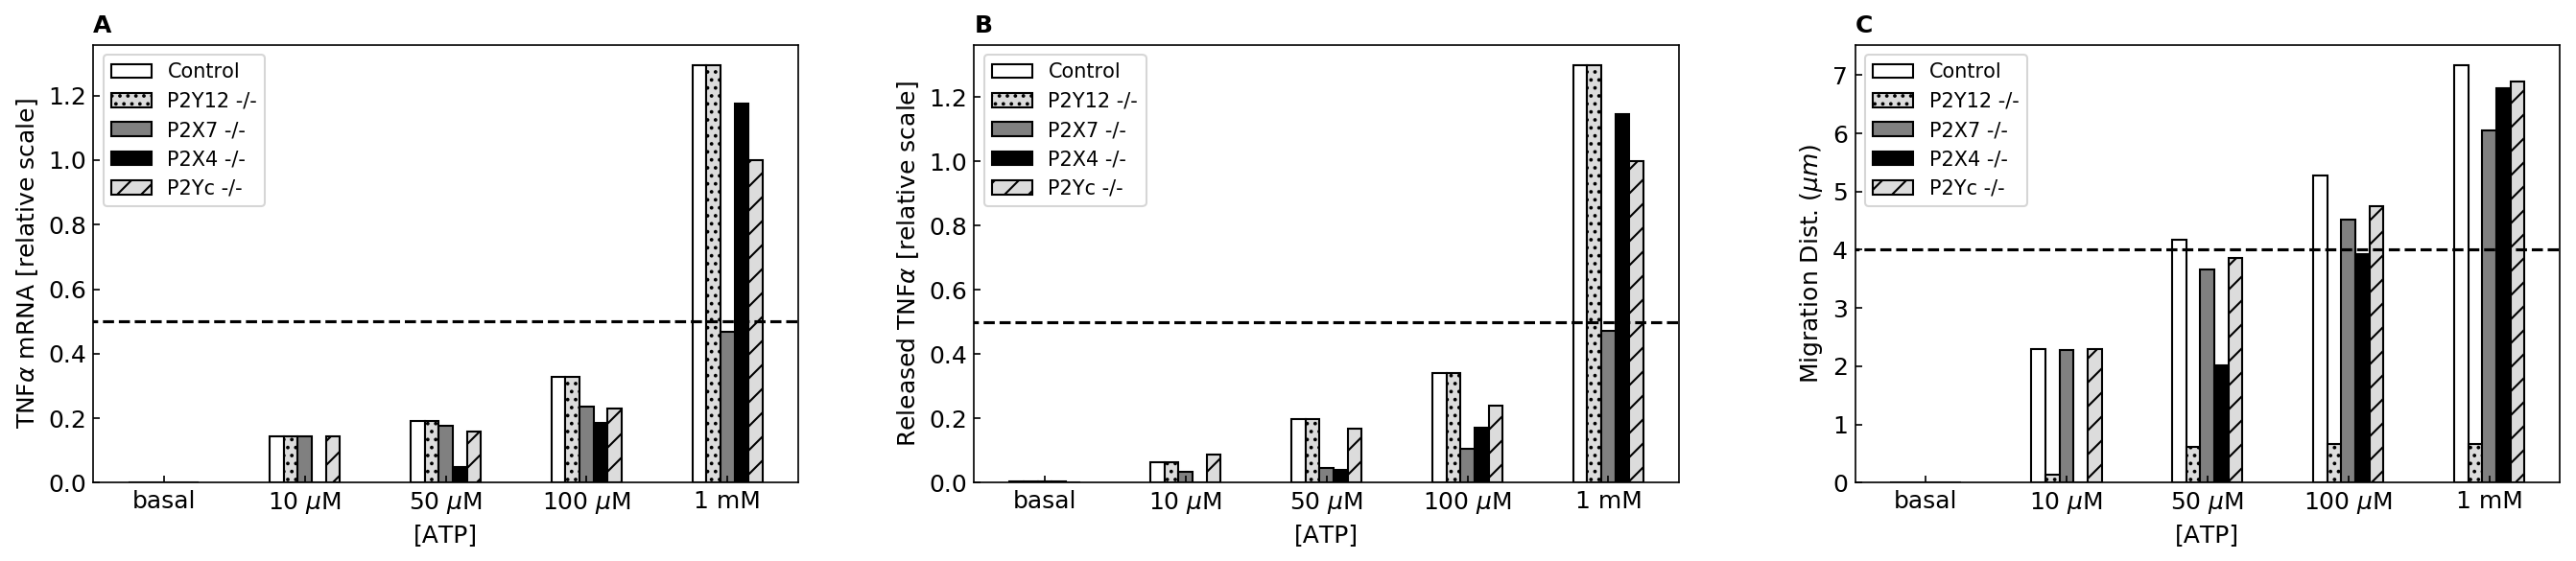

In [161]:
objects = ('basal','10 $\mu$M','50 $\mu$M','100 $\mu$M','1 mM')
y_pos = np.arange(len(objects))
x = 4 # control
y = 3  # P2Y12 -/-
z = 1  # P2X7 -/-
w = 2  # P2X4 -/-
t = 0  # P2Yc -/-
r = 5
data = np.array([mRNATNF[x][-1],mRNATNF[x+r][-1],mRNATNF[x+r*2][-1],mRNATNF[x+r*3][-1],mRNATNF[x+r*4][-1],
                 mRNATNF[y][-1],mRNATNF[y+r][-1],mRNATNF[y+r*2][-1],mRNATNF[y+r*3][-1],mRNATNF[y+r*4][-1],
                 mRNATNF[z][-1],mRNATNF[z+r][-1],mRNATNF[z+r*2][-1],mRNATNF[z+r*3][-1],mRNATNF[z+r*4][-1],
                 mRNATNF[w][-1],mRNATNF[w+r][-1],mRNATNF[w+r*2][-1],mRNATNF[w+r*3][-1],mRNATNF[w+r*4][-1],
                 mRNATNF[t][-1],mRNATNF[t+r][-1],mRNATNF[t+r*2][-1],mRNATNF[t+r*3][-1],mRNATNF[t+r*4][-1]])

control = (np.array([mRNATNF[x][-1],mRNATNF[x+r][-1],mRNATNF[x+r*2][-1],mRNATNF[x+r*3][-1],mRNATNF[x+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2y12 = (np.array([mRNATNF[y][-1],mRNATNF[y+r][-1],mRNATNF[y+r*2][-1],mRNATNF[y+r*3][-1],mRNATNF[y+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2x7 = (np.array([mRNATNF[z][-1],mRNATNF[z+r][-1],mRNATNF[z+r*2][-1],mRNATNF[z+r*3][-1],mRNATNF[z+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2x4 = (np.array([mRNATNF[w][-1],mRNATNF[w+r][-1],mRNATNF[w+r*2][-1],mRNATNF[w+r*3][-1],mRNATNF[w+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))
p2yc = (np.array([mRNATNF[t][-1],mRNATNF[t+r][-1],mRNATNF[t+r*2][-1],mRNATNF[t+r*3][-1],mRNATNF[t+r*4][-1]]) - min(data))/(mRNATNF[t+r*4][-1] - min(data))


bar_width = 0.1
space = bar_width/2

plt.figure(figsize=(18,4),dpi=150)
ax = plt.subplot(1,3,1)
plt.title('A',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[0.5,0.5],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'TNF$\alpha$ mRNA [relative scale]',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

data = np.array([TNFae[x][-1],TNFae[x+r][-1],TNFae[x+r*2][-1],TNFae[x+r*3][-1],TNFae[x+r*4][-1],
                 TNFae[y][-1],TNFae[y+r][-1],TNFae[y+r*2][-1],TNFae[y+r*3][-1],TNFae[y+r*4][-1],
                 TNFae[z][-1],TNFae[z+r][-1],TNFae[z+r*2][-1],TNFae[z+r*3][-1],TNFae[z+r*4][-1],
                 TNFae[w][-1],TNFae[w+r][-1],TNFae[w+r*2][-1],TNFae[w+r*3][-1],TNFae[w+r*4][-1],
                 TNFae[t][-1],TNFae[t+r][-1],TNFae[t+r*2][-1],TNFae[t+r*3][-1],TNFae[t+r*4][-1]])
control = (np.array([TNFae[x][-1],TNFae[x+r][-1],TNFae[x+r*2][-1],TNFae[x+r*3][-1],TNFae[x+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2y12 = (np.array([TNFae[y][-1],TNFae[y+r][-1],TNFae[y+r*2][-1],TNFae[y+r*3][-1],TNFae[y+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2x7 = (np.array([TNFae[z][-1],TNFae[z+r][-1],TNFae[z+r*2][-1],TNFae[z+r*3][-1],TNFae[z+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2x4 = (np.array([TNFae[w][-1],TNFae[w+r][-1],TNFae[w+r*2][-1],TNFae[w+r*3][-1],TNFae[w+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))
p2yc = (np.array([TNFae[t][-1],TNFae[t+r][-1],TNFae[t+r*2][-1],TNFae[t+r*3][-1],TNFae[t+r*4][-1]]) - min(data))/(TNFae[t+r*4][-1] - min(data))

ax = plt.subplot(1,3,2)
plt.title('B',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[0.5,0.5],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel(r'Released TNF$\alpha$ [relative scale]',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

data = np.array([dist[x][-1],dist[x+r][-1],dist[x+r*2][-1],dist[x+r*3][-1],dist[x+r*4][-1],
                 dist[y][-1],dist[y+r][-1],dist[y+r*2][-1],dist[y+r*3][-1],dist[y+r*4][-1],
                 dist[z][-1],dist[z+r][-1],dist[z+r*2][-1],dist[z+r*3][-1],dist[z+r*4][-1],
                 dist[w][-1],dist[w+r][-1],dist[w+r*2][-1],dist[w+r*3][-1],dist[w+r*4][-1],
                 dist[t][-1],dist[t+r][-1],dist[t+r*2][-1],dist[t+r*3][-1],dist[t+r*4][-1]])


control = np.array([dist[x][-1],dist[x+r][-1],dist[x+r*2][-1],dist[x+r*3][-1],dist[x+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2y12   = np.array([dist[y][-1],dist[y+r][-1],dist[y+r*2][-1],dist[y+r*3][-1],dist[y+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2x7    = np.array([dist[z][-1],dist[z+r][-1],dist[z+r*2][-1],dist[z+r*3][-1],dist[z+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2x4    = np.array([dist[w][-1],dist[w+r][-1],dist[w+r*2][-1],dist[w+r*3][-1],dist[w+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]
p2yc    = np.array([dist[t][-1],dist[t+r][-1],dist[t+r*2][-1],dist[t+r*3][-1],dist[t+r*4][-1]])#/dist[x+r*2][-1]*50  #/dist[t+r*4][-1]


ax = plt.subplot(1,3,3)
plt.title('C',fontsize=12,fontweight='bold',loc='left')
plt.bar(y_pos-space*4, control, bar_width, align='center', color='white', alpha=1, edgecolor='black', label='Control')
plt.bar(y_pos-space*2, p2y12, bar_width, align='center', color='gainsboro', alpha=1, hatch='...', edgecolor='black', label='P2Y12 -/-')
plt.bar(y_pos+space*0, p2x7, bar_width, align='center', color='gray', alpha=1, edgecolor='black', label='P2X7 -/-')
plt.bar(y_pos+space*2, p2x4, bar_width, align='center', color='black', alpha=1, edgecolor='black', label='P2X4 -/-')
plt.bar(y_pos+space*4, p2yc, bar_width, align='center', color='gainsboro', alpha=1, hatch='//', edgecolor='black', label='P2Yc -/-')
plt.plot([-1,5],[4,4],'k--')
plt.xlim([-0.5,4.5])
plt.tick_params(labelsize=12,direction='in')
plt.xticks(y_pos, objects)
plt.ylabel('Migration Dist. ($\mu m$)',fontsize=12)
plt.xlabel('[ATP]',fontsize=12)
plt.legend(loc=0,fontsize=10)
plt.tight_layout()

plt.subplots_adjust(wspace=0.25)
plt.savefig("mRNAvsTNFvsMig.png")

#### 5 min stimulation duration 

In [28]:
p4 = {'rest':1/2.95, 'primary': 1, 'bv2':0.187}
p7 = {'rest':2.65,   'primary': 1, 'bv2':0.65}
py = {'rest':1/11.1, 'primary': 1, 'bv2':1}
p12= {'rest':100,   'primary': 1, 'bv2':0.03}
ATP = [0, 10, 50, 100, 1000]

collectedData = {}

# Primary Cultured
for atp in ATP:
    for expr in ['rest','primary','bv2']:
        data   = SR.gotranMicroglia(sim_time      = 300,
                                    ATP           = atp,
                                    rhop2yc       = py[expr],
                                    rhop2y12      = p12[expr],
                                    rhop2x4       = p4[expr],
                                    rhop2x7       = p7[expr],
                                    output_name   = 'test1',
                                    ode_file_name = odefilename,
                                    stim_duration = 300, # in second
                                    data_name2    = 'NFATNn',
                                    data_name3    = 'VelMig',
                                    data_name4    = 'TNFae',
                                    data_name5    = 'Distance',
                                    data_name6    = 'SigCaM',
                                    data_name7    = 'pAkt',
                                    data_name8    = 'Ca4_CaM',
                                    data_name9    = 'SigpA',
                                    data_name10   = 'VelMig',
                                    removePickle  = 1,
                                    PulSwitch     = 1,
                                    timePrint     = 1)
        collectedData[str(atp)+expr] = data

 -------------- 3.076558828353882 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.096914291381836 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.1035542488098145 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.3470370769500732 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.117496967315674 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.123464822769165 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.2284319400787354 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.290785312652588 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.299375295639038 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.1810081005096436 seconds --------------
 ------------ End of Simulatio

In [30]:
dura = collectedData['10rest'][0]

0.27272757024766336


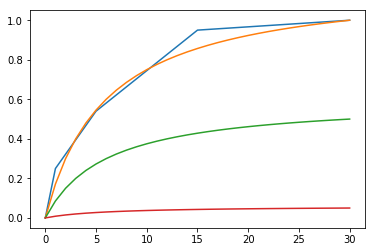

In [32]:
t = [0,1,5,15,30]
value = [0, 0.25,0.54,0.95,1]
def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)
time = np.arange(31)
plt.plot(t,value)
plt.plot(time,func(time,1.2,6,1))
plt.plot(time,func(time,1.2*0.5,6,1))
plt.plot(time,func(time,1.2/20,6,1))

print(func(5,1.2*0.5,6,1))

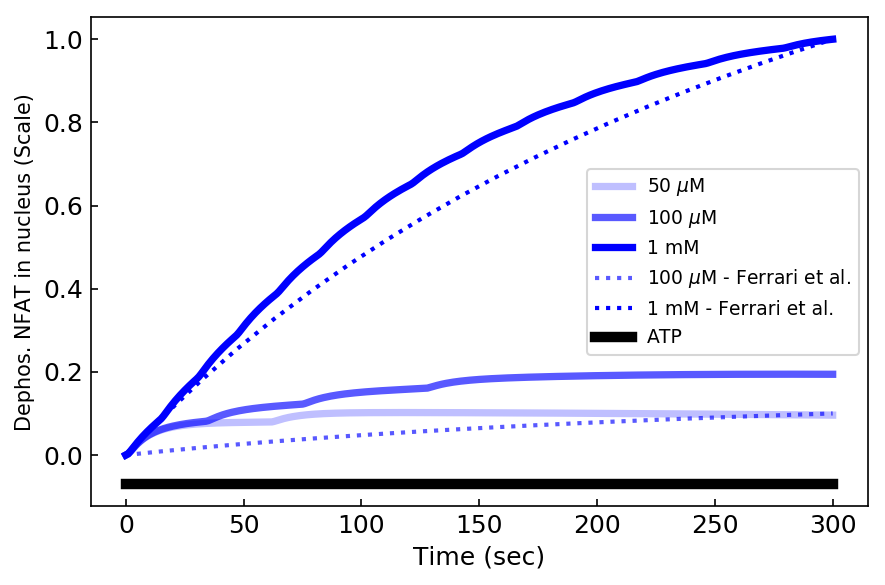

In [31]:
time = scipy.linspace(0,5,20)

def func(x, a, b, c):
    return a/(1+(b/(x+0.00001))**c)

maxexp = func(5,1.2*0.5,6,1)

init = min(collectedData['50primary'][2])
final = max(collectedData['1000primary'][2]) -init
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura,(collectedData['50primary'][2]-init)/final,'b',lw=3.5,alpha=0.25,label='50 $\mu$M')
plt.plot(dura,(collectedData['100primary'][2]-init)/final,'b',lw=3.5,alpha=0.65,label='100 $\mu$M')
plt.plot(dura,(collectedData['1000primary'][2]-init)/final,'b',lw=3.5,alpha=1,label='1 mM')
plt.plot(time*60,func(time,1.2/20,6,1)/maxexp,'b:',lw=2,alpha=0.65,label='100 $\mu$M - Ferrari et al.')
plt.plot(time*60,func(time,1.2/2,6,1)/maxexp,'b:',lw=2,alpha=1,label='1 mM - Ferrari et al.')
plt.plot([0,300],[-0.07,-0.07],'k',lw=5,label='ATP')
plt.ylabel('Dephos. NFAT in nucleus (Scale)',fontsize=10)
plt.xlabel('Time (sec)',fontsize=12)
plt.legend(loc=0,fontsize=9)
plt.tight_layout()
plt.savefig('NFATtime.png')

## NFAT Validation

In [33]:
p2x4 = np.array([0,1,9])
p2x7 = np.array([0,1])
p2y1 = 1
scale = 10000
###### No ATP ####################################
d0     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 3000,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration33',
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d00     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 0,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration33',
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d100     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 100,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration33',
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d500     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 500,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration33',
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)
d1000     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 1000,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration33',
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

d3000     = SR.gotranMicroglia(sim_time      = 3600,
                            ATP           = 3000,
                            output_name   = 'test1',
                            ode_file_name = 'p2xp2yMigration33',
                            data_name2    = 'NFATpc',
                            data_name3    = 'NFATpn',
                            data_name4    = 'NFATNn',
                            data_name5    = 'Ca4_CN',
                            DegSwitch     = 0,
                            removePickle  = 1)

 -------------- 33.84263610839844 seconds --------------
 ------------ End of Simulation -----------
 -------------- 19.306936740875244 seconds --------------
 ------------ End of Simulation -----------
 -------------- 29.223784923553467 seconds --------------
 ------------ End of Simulation -----------
 -------------- 31.424557209014893 seconds --------------
 ------------ End of Simulation -----------
 -------------- 33.06374740600586 seconds --------------
 ------------ End of Simulation -----------
 -------------- 33.68597650527954 seconds --------------
 ------------ End of Simulation -----------


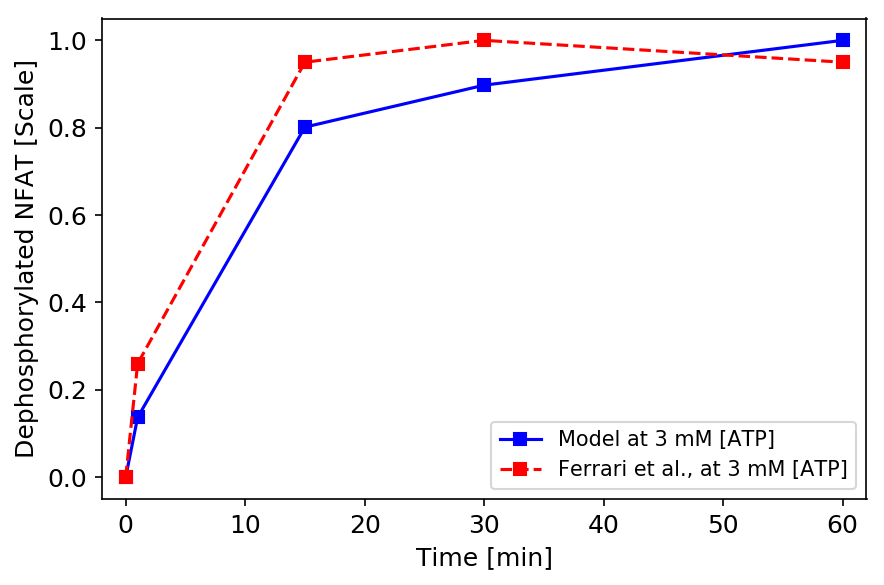

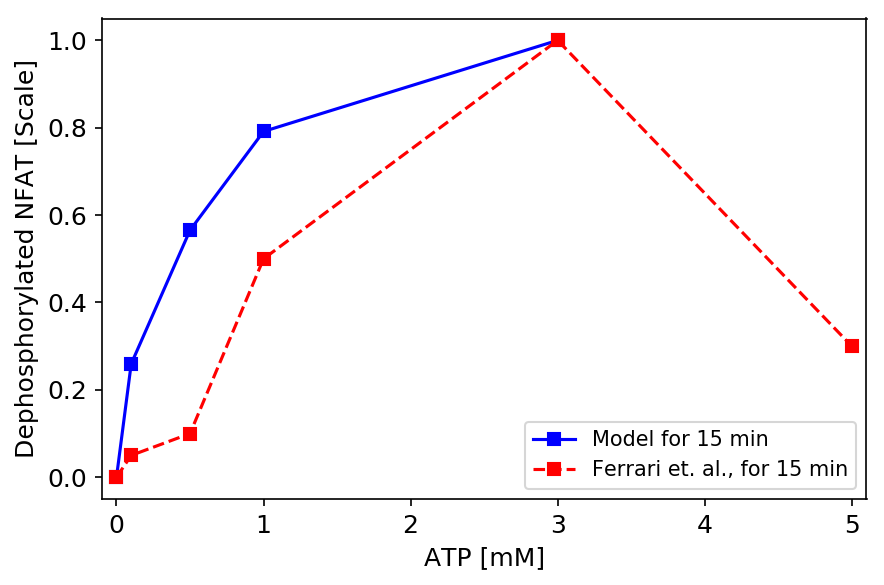

In [34]:
LitNFATr = np.array([0,0.26,0.95,1,0.95]) # in fraction
Littime = np.array([0,1,15,30,60]) # in min
CalcData = np.array([d0[4][0],d0[4][59],d0[4][899],d0[4][1799],d0[4][3599]])-d0[4][0]
ProcData = CalcData/max(CalcData)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12)
plt.plot(Littime,ProcData,'b-s',label="Model at 3 mM [ATP]")
plt.plot(Littime,LitNFATr,'r--s',label="Ferrari et al., at 3 mM [ATP]")

plt.xlim(-2,62)
plt.ylim(-0.05,1.05)

plt.legend(loc=0,fontsize=10)
plt.xlabel("Time [min]",fontsize=12)
plt.ylabel("Dephosphorylated NFAT [Scale]",fontsize=12)
plt.tight_layout()

ATPmM1 = np.array([0,0.1,0.5,1,3])
ATPmM2 = np.array([0,0.1,0.5,1,3,5]) 
LitNFATr = np.array([0,0.05,0.1,0.5,1,0.3])
CalcData2 = np.array([d00[4][-1],d100[4][-1],d500[4][-1],d1000[4][-1],d3000[4][-1]])-d00[4][-1]
ProcData2 = CalcData2/max(CalcData2)

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12)
plt.plot(ATPmM1,ProcData2,'b-s',label="Model for 15 min")
plt.plot(ATPmM2,LitNFATr,'r--s',label="Ferrari et. al., for 15 min")

plt.xlim(-0.1,5.1)
plt.ylim(-0.05,1.05)

plt.legend(loc=0,fontsize=10)
plt.xlabel("ATP [mM]",fontsize=12)
plt.ylabel("Dephosphorylated NFAT [Scale]",fontsize=12)
plt.tight_layout()

### Freq vs. Elev

In [35]:
time = 300
counter = 0
Kp = [5,10,15,20,25,30,35] #scipy.linspace(5,20,10)
p2x7 = scipy.linspace(0.01,1,10)
for i in np.arange(len(Kp)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration33', # 6 works
                                    kg_p2y        = Kp[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    data_name5    = 'GaGTP',
                                    data_name6    = 'DAG',
                                    DegSwitch     = 0,
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            gprot   = data[5]
            ip3     = data[6]
            entry   = counter
            kp      = Kp[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            gprot   = np.vstack([gprot,data[5]])
            ip3     = np.vstack([ip3,data[6]])
            kp      = np.append(kp,Kp[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'Kp': kp,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 3.156217098236084 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.3701882362365723 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.5965731143951416 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.8616068363189697 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.255631923675537 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.0538716316223145 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.746412038803101 seconds --------------
 ------------ End of Simulation -----------


,Kp
0,5
1,10
2,15
3,20
4,25
5,30
6,35


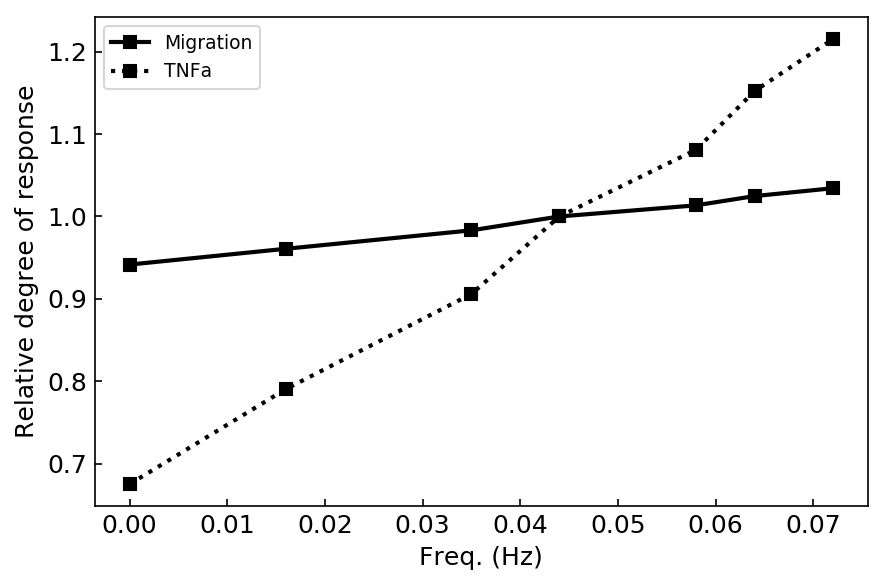

In [36]:
distdummy = np.zeros(7)
tnfdummy = np.zeros(7)
for i in np.arange(7):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[3]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[3]-tnfe[0][0])

frequency = [0.0,0.016,0.035,0.044,0.058,0.064,0.072]

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(frequency,dist_data,'ks-',lw=2,alpha=1,label="Migration")
plt.plot(frequency,tnf_data,'ks:',lw=2,alpha=1,label="TNFa")
plt.legend(loc=0,fontsize=9)
plt.xlabel("Freq. (Hz)",fontsize=12)
plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Cafreq.png")

In [37]:
time = 300
counter = 0
#Kp = [10,15,20,25,30,35,40,45] #scipy.linspace(5,20,10)
p2x7 = [0.01,0.1,0.5,1,1.5,2,2.5,5]
for i in np.arange(len(p2x7)): # ATP
    data   = SR.gotranMicroglia(sim_time      = time,
                                    ATP           = 200,
                                    output_name   = 'test1',
                                    ode_file_name = 'p2xp2yMigration33', # 6 works
                                    rhop2x7       = p2x7[i],
                                    data_name2    = 'TNFae',
                                    data_name3    = 'mRNA_TNF',
                                    data_name4    = 'Distance',
                                    DegSwitch     = 0,
                                    removePickle  = 1)
    
    if counter == 0:
            dura    = data[0]
            Ca      = data[1]
            tnfe    = data[2]
            mrna    = data[3]
            dist    = data[4]
            entry   = counter
            p2x7z      = p2x7[i]
    else:
            Ca      = np.vstack([Ca,data[1]])
            tnfe    = np.vstack([tnfe,data[2]])
            mrna    = np.vstack([mrna,data[3]])
            dist    = np.vstack([dist,data[4]])
            p2x7z      = np.append(p2x7z,p2x7[i])
        
    counter = counter + 1 
        
import pandas as pd 

data = {
    'p2x7': p2x7,
}

calchart = pd.DataFrame(data)
pd.set_option('display.max_rows',90)
calchart

 -------------- 4.155097246170044 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.851834297180176 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.7484705448150635 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.7880735397338867 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.062939167022705 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.749516248703003 seconds --------------
 ------------ End of Simulation -----------
 -------------- 4.063389301300049 seconds --------------
 ------------ End of Simulation -----------
 -------------- 3.7791061401367188 seconds --------------
 ------------ End of Simulation -----------


,p2x7
0,0.01
1,0.10
2,0.50
3,1.00
4,1.50
5,2.00
6,2.50
7,5.00


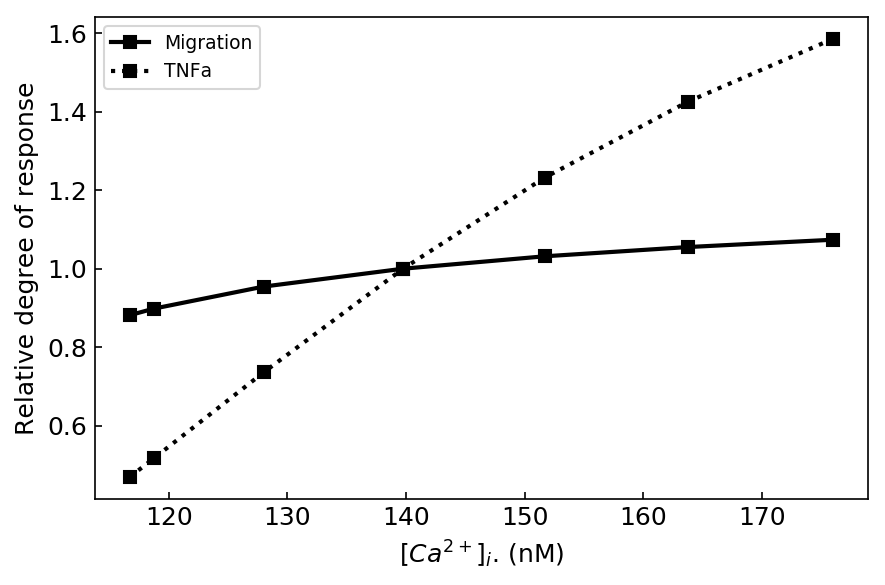

In [39]:
Ca_elev = np.zeros(7)
for i in np.arange(7):
    Ca_elev[i] = np.average(Ca[i][0:300])

distdummy = np.zeros(7)
tnfdummy = np.zeros(7)
for i in np.arange(7):
    distdummy[i] = dist[i][300]
    tnfdummy[i] = tnfe[i][300]
dist_data = distdummy / distdummy[3]    
tnf_data = (tnfdummy - tnfe[0][0]) / (tnfdummy[3]-tnfe[0][0])

plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(Ca_elev,dist_data,'ks-',lw=2,alpha=1,label="Migration")
plt.plot(Ca_elev,tnf_data,'ks:',lw=2,alpha=1,label="TNFa")
plt.legend(loc=0,fontsize=9)
plt.xlabel("$[Ca^{2+}]_i$. (nM)",fontsize=12)
plt.ylabel("Relative degree of response",fontsize=12)
plt.tight_layout()
#plt.savefig("Caelev.png")

## CD39

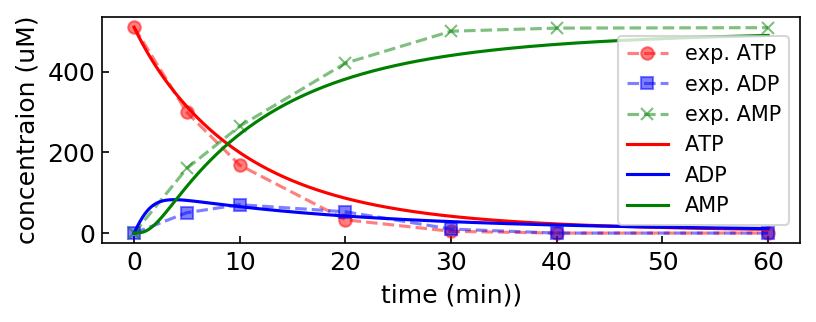

In [40]:
# Exp 
time   = np.array([0,5,10,20,30,40,60])
ATPexp = np.array([509.8901099,298.9010989,168.1318681,32.96703297,4.395604396,0,0])
ADPexp = np.array([0,50.54945055,70.32967033,52.74725275,9.89010989,0,0])
AMPexp = np.array([0,160.4395604,264.8351648,420.8791209,500,507.6923077,508.7912088])

def func(y,t):
    ATP,ADP,AMP = y
    
    k1f = 0.0018
    k1b = 0.001 
    k2 = 0.00008
    
    dATPdt = -k1f*ATP + k1b*ADP
    dADPdt = k1f*ATP - k1b*ADP - k2*ADP**2
    dAMPdt = k2*ADP**2
    
    dydt = [dATPdt, dADPdt, dAMPdt]
    
    return dydt

t = scipy.linspace(0,3600,3600)

y0 = np.array([510,0,0])
y = scipy.integrate.odeint(func,y0,t)

plt.figure(figsize=(6,2),dpi=150)
plt.tick_params(labelsize=12,direction='in')

plt.plot(time,ATPexp,'r--o',alpha=0.5,label="exp. ATP")
plt.plot(time,ADPexp,'b--s',alpha=0.5,label="exp. ADP")
plt.plot(time,AMPexp,'g--x',alpha=0.5,label="exp. AMP")
plt.plot(t/60,y[:,0],'r-',alpha=1,label='ATP')
plt.plot(t/60,y[:,1],'b-',alpha=1,label='ADP')
plt.plot(t/60,y[:,2],'g-',alpha=1,label='AMP')

plt.xlabel("time (min))",fontsize=12)
plt.ylabel("concentraion (uM)",fontsize=12)
plt.legend(loc=0,fontsize=10)    

In [41]:
data_w_deg_10    = SR.gotranMicroglia(sim_time      = 300,
                                   ATP           = 10,
                                   rhop2yc       = 1,
                                   rhop2y12      = 1,
                                   rhop2x4       = 1,
                                   rhop2x7       = 1,
                                   output_name   = 'test1',
                                   ode_file_name = 'p2xp2yMigration33',
                                   data_name2    = 'pAkt',
                                   data_name3    = 'Distance',
                                   data_name4    = 'TNFae',
                                   data_name5    = 'VelMig',
                                   data_name6    = 'mRNA_TNF',
                                   removePickle  = 1,
                                   DegSwitch     = 1,
                                   timePrint     = 0)
data_wo_deg_10 = SR.gotranMicroglia(sim_time      = 300,
                                 ATP           = 10,
                                 rhop2yc       = 1,
                                 rhop2y12      = 1,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = 'p2xp2yMigration33',
                                 data_name2    = 'pAkt',
                                 data_name3    = 'Distance',
                                 data_name4    = 'TNFae',
                                 data_name5    = 'VelMig',
                                 data_name6    = 'mRNA_TNF',
                                 removePickle  = 1,
                                 DegSwitch     = 0,
                                 timePrint     = 0)

data_w_deg_50    = SR.gotranMicroglia(sim_time      = 300,
                                   ATP           = 50,
                                   rhop2yc       = 1,
                                   rhop2y12      = 1,
                                   rhop2x4       = 1,
                                   rhop2x7       = 1,
                                   output_name   = 'test1',
                                   ode_file_name = 'p2xp2yMigration33',
                                   data_name2    = 'pAkt',
                                   data_name3    = 'Distance',
                                   data_name4    = 'TNFae',
                                   data_name5    = 'VelMig',
                                   data_name6    = 'mRNA_TNF',
                                   removePickle  = 1,
                                   DegSwitch     = 1,
                                   timePrint     = 0)
data_wo_deg_50 = SR.gotranMicroglia(sim_time      = 300,
                                 ATP           = 50,
                                 rhop2yc       = 1,
                                 rhop2y12      = 1,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = 'p2xp2yMigration33',
                                 data_name2    = 'pAkt',
                                 data_name3    = 'Distance',
                                 data_name4    = 'TNFae',
                                 data_name5    = 'VelMig',
                                 data_name6    = 'mRNA_TNF',
                                 removePickle  = 1,
                                 DegSwitch     = 0,
                                 timePrint     = 0)

data_w_deg_100    = SR.gotranMicroglia(sim_time      = 300,
                                   ATP           = 100,
                                   rhop2yc       = 1,
                                   rhop2y12      = 1,
                                   rhop2x4       = 1,
                                   rhop2x7       = 1,
                                   output_name   = 'test1',
                                   ode_file_name = 'p2xp2yMigration33',
                                   data_name2    = 'pAkt',
                                   data_name3    = 'Distance',
                                   data_name4    = 'TNFae',
                                   data_name5    = 'VelMig',
                                   data_name6    = 'mRNA_TNF',
                                   removePickle  = 1,
                                   DegSwitch     = 1,
                                   timePrint     = 0)
data_wo_deg_100 = SR.gotranMicroglia(sim_time      = 300,
                                 ATP           = 100,
                                 rhop2yc       = 1,
                                 rhop2y12      = 1,
                                 rhop2x4       = 1,
                                 rhop2x7       = 1,
                                 output_name   = 'test1',
                                 ode_file_name = 'p2xp2yMigration33',
                                 data_name2    = 'pAkt',
                                 data_name3    = 'Distance',
                                 data_name4    = 'TNFae',
                                 data_name5    = 'VelMig',
                                 data_name6    = 'mRNA_TNF',
                                 removePickle  = 1,
                                 DegSwitch     = 0,
                                 timePrint     = 0)

In [42]:
dura = data_w_deg_10[0]
tnfw10 = data_w_deg_10[6]
tnfwo10 = data_wo_deg_10[6]
tnfw50 = data_w_deg_50[6]
tnfwo50 = data_wo_deg_50[6]
tnfw100 = data_w_deg_100[6]
tnfwo100 = data_wo_deg_100[6]
d1 = (tnfw10 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d2 = (tnfwo10 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d3 = (tnfw50 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d4 = (tnfwo50 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d5 = (tnfw100 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])
d6 = (tnfwo100 - tnfw10[0])/(tnfw100[-1]-tnfw10[0])

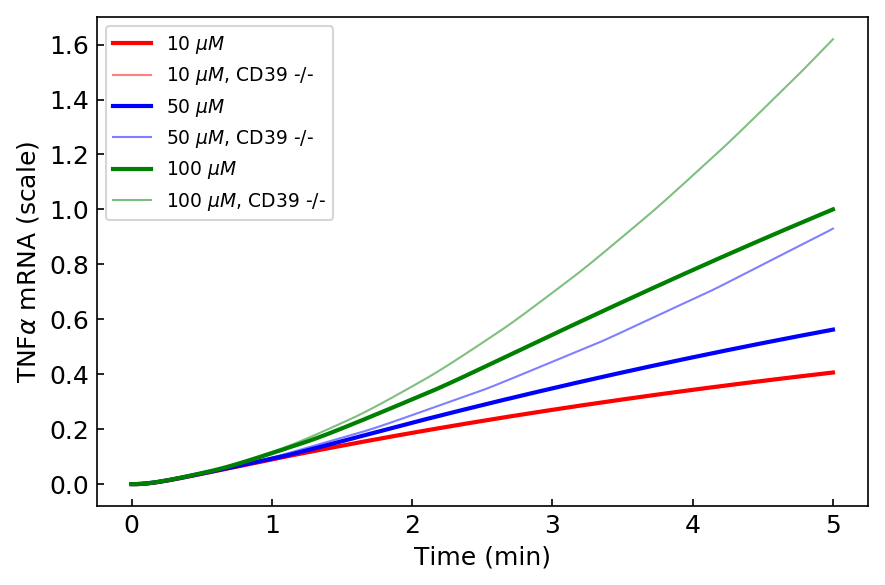

In [43]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(labelsize=12,direction='in')
plt.plot(dura/60,d1,'r-',lw=2,label='10 $\mu M$')
plt.plot(dura/60,d2,'r-',lw=1,alpha=0.5,label='10 $\mu M$, CD39 -/-')
plt.plot(dura/60,d3,'b-',lw=2,label='50 $\mu M$')
plt.plot(dura/60,d4,'b-',lw=1,alpha=0.5,label='50 $\mu M$, CD39 -/-')
plt.plot(dura/60,d5,'g-',lw=2,label='100 $\mu M$')
plt.plot(dura/60,d6,'g-',lw=1,alpha=0.5,label='100 $\mu M$, CD39 -/-')
plt.xlabel('Time (min)',fontsize=12)
plt.ylabel(r'TNF$\alpha$ mRNA (scale)',fontsize=12)
plt.legend(fontsize=9,loc=0)
plt.tight_layout()